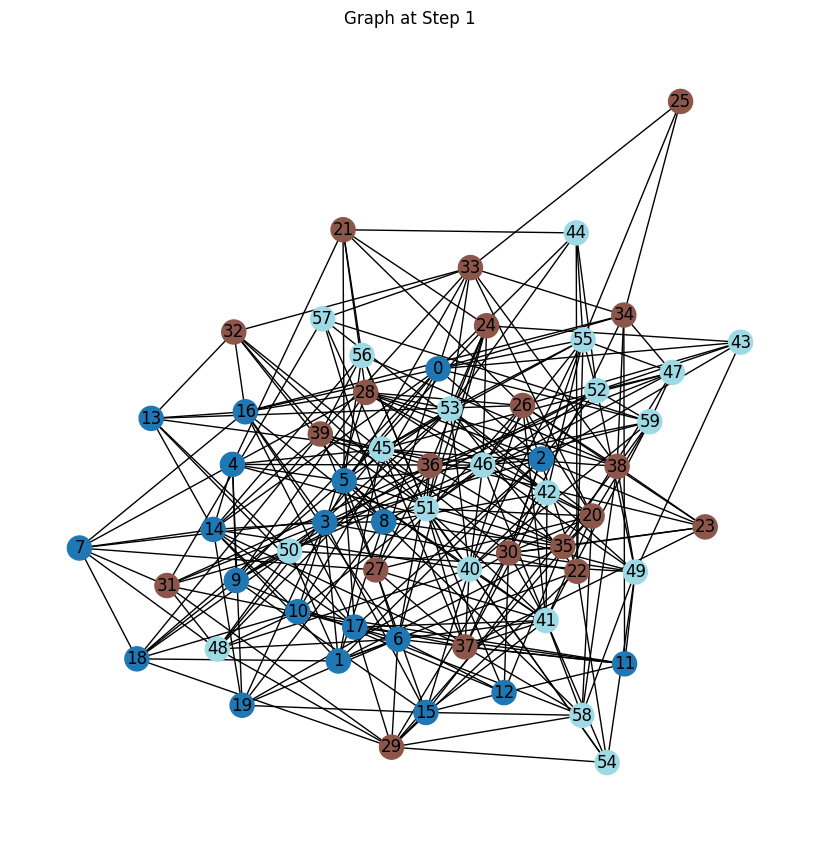

ValueError: 'c' argument has 60 elements, which is inconsistent with 'x' and 'y' with size 75.

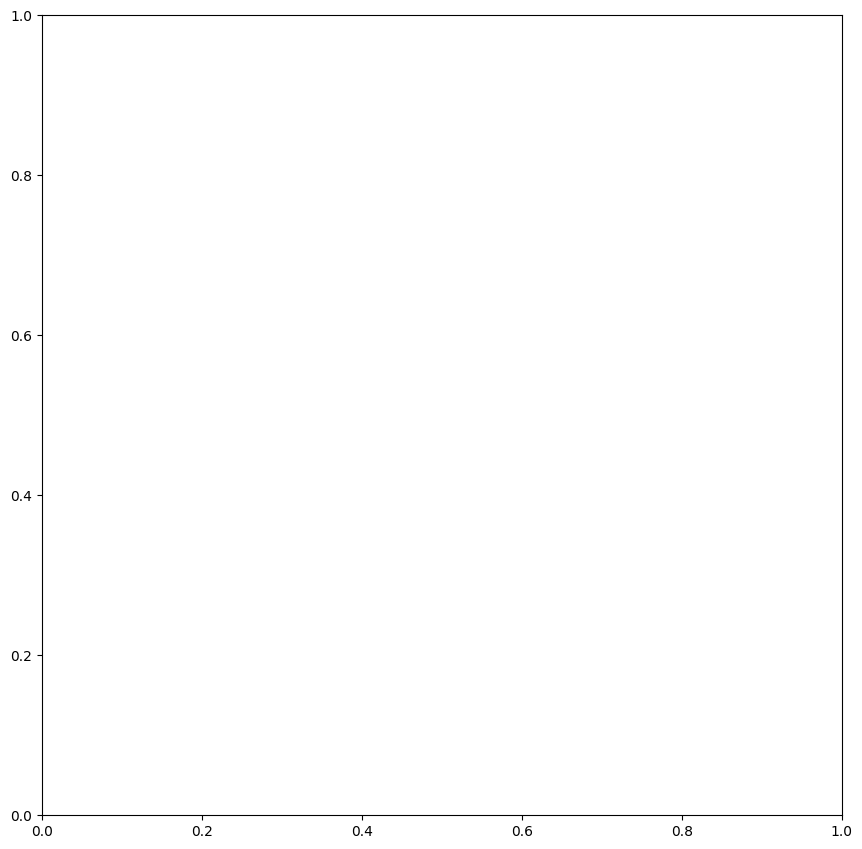

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_graph_with_new_nodes(G, clusters, pc=0.3, pc_between_clusters=0.1):
    """Add 5 new vertices to each existing cluster and create edges according to the probabilities."""
    node_counter = max(G.nodes) + 1  # Start numbering new nodes from the highest existing node
    
    for i, cluster in enumerate(clusters):
        # Create 5 new nodes for this cluster
        new_cluster_nodes = list(range(node_counter, node_counter + 5))  # Add 5 new nodes
        G.add_nodes_from(new_cluster_nodes)
        node_counter += 5
        
        # Add edges within the same cluster
        for new_node in new_cluster_nodes:
            for node in cluster:  # Edges between new nodes and old nodes in the same cluster
                if random.random() < pc:
                    G.add_edge(new_node, node)
            
            # Add edges between new nodes and nodes in other clusters
            for other_cluster_index, other_cluster in enumerate(clusters):
                if other_cluster_index != i:  # Edges between new nodes and nodes in other clusters
                    for node in other_cluster:
                        if random.random() < pc_between_clusters:
                            G.add_edge(new_node, node)

    return G

def remove_nodes_and_edges(G, clusters):
    """Remove 5 nodes from each cluster and the edges connected to them."""
    new_clusters = []
    
    for i, cluster in enumerate(clusters):
        # Remove 5 nodes from the cluster
        nodes_to_remove = cluster[-5:]
        new_cluster = cluster[:-5]
        new_clusters.append(new_cluster)
        
        # Remove the nodes and the edges
        G.remove_nodes_from(nodes_to_remove)
        
    return G, new_clusters

def plot_graph(G, clusters, step):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 8))
    
    # Color nodes by their cluster
    colors = []
    for node in G.nodes:
        for i, cluster in enumerate(clusters):
            if node in cluster:
                colors.append(i)
                break
    
    # Ensure colors list matches the number of nodes in the graph
    if len(colors) != len(G.nodes):
        colors = [0] * len(G.nodes)  # Default to single color if mismatch
    
    nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.get_cmap('tab20', len(clusters)))
    plt.title(f"Graph at Step {step}")
    plt.show()

# Number of clusters (based on your requirements)
num_clusters = 3
initial_size = 20
max_size = 60
cluster_sizes = [initial_size] * num_clusters

# Generate the first graph with 20 nodes per cluster
G = nx.Graph()
clusters = []
node_counter = 0

# Add nodes and form clusters for the first graph
for i in range(num_clusters):
    cluster_size = cluster_sizes[i]
    cluster_nodes = list(range(node_counter, node_counter + cluster_size))
    clusters.append(cluster_nodes)
    G.add_nodes_from(cluster_nodes)
    node_counter += cluster_size

# Add edges within clusters for the first graph
for cluster in clusters:
    for i in range(len(cluster)):
        for j in range(i + 1, len(cluster)):
            if random.random() < 0.3:
                G.add_edge(cluster[i], cluster[j])

# Add edges between clusters for the first graph
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        for node_i in clusters[i]:
            for node_j in clusters[j]:
                if random.random() < 0.1:
                    G.add_edge(node_i, node_j)

# Plot the first graph
plot_graph(G, clusters, step=1)

# Generate and plot graphs from 2 to 9 (expanding the clusters)
for step in range(2, 10):
    G = generate_graph_with_new_nodes(G, clusters)
    plot_graph(G, clusters, step=step)

# Now generate and plot graphs from 10 to 17 (shrinking the clusters)
for step in range(10, 18):
    G, clusters = remove_nodes_and_edges(G, clusters)
    plot_graph(G, clusters, step=step)
